**Задание #3, Вариант #29**

In [1]:
import math
import numpy as np
from tabulate import tabulate
from numpy.linalg import solve

Исходные данные - ядро $K(x, s)$

In [2]:
def K(x,s):
    return np.divide(1, 1+x+s)

$z(s) = 1$ - вычислим u(x) через интеграл ядра от 0 до 1

In [3]:
def u(x):
    return (np.log(x + 2) - np.log(x + 1))

Вычисление узлов для формулы средних прямоугольников:

In [4]:
def build_nodes(N):
    result = []
    for i in range(N):
        result.append(i/N+1/(2*N))
    return result

Построение матрицы С:

In [5]:
def build_matrix(N):
    result = np.zeros((N,N))
    nodes = build_nodes(N)
    for i in range(N):
        for j in range(N):
            result[i,j] = K(nodes[i],nodes[j])*(1/N)
    return result

Построение значений u(x) в узлах квадратурной формулы средних прямоугольников при z(s)=1

In [6]:
def build_right_part(N):
    result = np.zeros((N,1))
    nodes = build_nodes(N)
    for i in range(N):
            result[i] = u(nodes[i])
    return result

Решение СЛАУ методом регуляризации матрицы c параметром а:

In [7]:
def build_solution(N,a):
    C = build_matrix(N)
    right = build_right_part(N)
    return solve(np.transpose(C)@C+a*np.identity(N),np.transpose(C)@right)

Рассмотрим погрешность при различных параметрах N (число узлов) и a (параметр метода регуляризации) и запишем результат в файл в виде таблицы.

In [8]:
N = 10
ans = np.zeros((N,N+1))
for i in range(1,N+1):
    ans[i-1,0] = i*10
headers = [r'n\a']
for j in range(6,6+N):
    headers.append(10**(-j))
residuals = []
for i in range(1,1+N):
    u0 = np.ones((N*i,1))
    residuals.append(N*i)
    for j in range(6,6+N):
        solution = build_solution(N*i,10**(-j))
        ans[i-1,j-5] = abs(u0-solution).max()

In [9]:
res_table = tabulate(ans,headers=headers,
               tablefmt='github',numalign="right")
with open('result3.txt','w') as file:
    file.write(res_table)

Результат, оформленный в виде таблицы

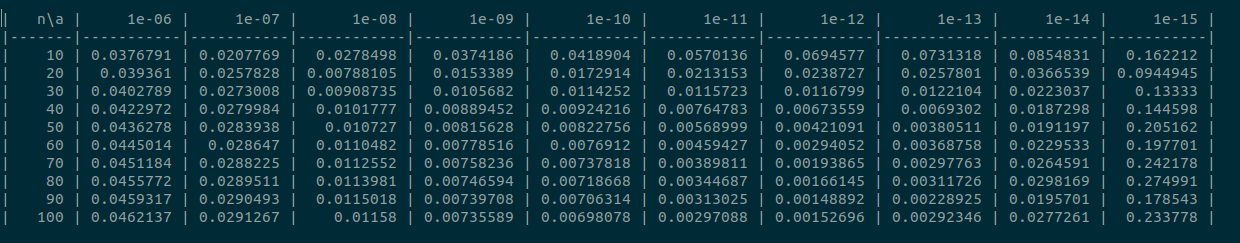

Посмотрим на индекс минимального элемента таблицы. Таким образом, наименьшая погрешность достигается при числе узлов $N=90$ и параметре $а=1e-12$, и именно они являются оптимальными параметрами для данной задачи.

Сама погрешность:

In [10]:
ind = np.unravel_index(np.argmin(ans, axis=None), ans.shape)
ans[ind]

0.0014889215500990538